<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Projeto_de_Estudo_Estrutura_de_Dados_Arvores_de_Decisao/blob/main/Estrutura_de_Dados_%C3%81rvores_TRIE_PATRICIA_B_Treap_Hash_Tree_Merkle_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=lightgreen>Árvore TRIE

##<font color=lightgreen>A TRIE (ou Prefix Tree) é uma árvore de prefixo, frequentemente utilizada para armazenar uma grande quantidade de strings de forma eficiente, especialmente em aplicações de auto-completar, verificação ortográfica e busca de palavras. Cada nó representa um caractere e, ao longo do caminho, os nós formam palavras. A vantagem da TRIE é que ela compartilha prefixos comuns, economizando memória.

##<font color=hottblue>Exemplo de uso: Dicionários e sistemas de auto-sugestão em buscas.

##Explicação do código:

TrieNode: Representa um nó na árvore TRIE, com um dicionário children para armazenar os filhos e um booleano is_end_of_word que indica se o nó atual marca o final de uma palavra.

Trie: É a classe principal que contém métodos para manipular a TRIE.
insert: Insere uma palavra na árvore, adicionando nós conforme necessário e marcando o fim da palavra.

search: Verifica se uma palavra específica existe na árvore.
starts_with: Verifica se há alguma palavra na árvore que começa com um dado prefixo.

Testes:

O exemplo final mostra como inserir palavras, buscar palavras específicas e verificar a existência de prefixos.

Esse código é ótimo para entender o funcionamento básico de uma TRIE e serve como base para aplicações como autocompletar e busca de palavras por prefixos.

In [ ]:
class TrieNode:
    def __init__(self):
        # Cada nó terá um dicionário de filhos e uma flag para marcar o fim de uma palavra
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        # A raiz da TRIE é um nó vazio
        self.root = TrieNode()

    def insert(self, word):
        """Insere uma palavra na árvore TRIE."""
        current_node = self.root
        for char in word:
            # Se o caractere não está nos filhos, adicionamos um novo nó
            if char not in current_node.children:
                current_node.children[char] = TrieNode()
            # Move para o próximo nó
            current_node = current_node.children[char]
        # Marca o fim da palavra
        current_node.is_end_of_word = True

    def search(self, word):
        """Verifica se uma palavra está na árvore TRIE."""
        current_node = self.root
        for char in word:
            # Se o caractere não está nos filhos, a palavra não existe
            if char not in current_node.children:
                return False
            # Move para o próximo nó
            current_node = current_node.children[char]
        # Retorna True se a palavra termina aqui e foi marcada como fim de palavra
        return current_node.is_end_of_word

    def starts_with(self, prefix):
        """Verifica se há alguma palavra na árvore TRIE que começa com o prefixo fornecido."""
        current_node = self.root
        for char in prefix:
            # Se o caractere não está nos filhos, o prefixo não existe
            if char not in current_node.children:
                return False
            # Move para o próximo nó
            current_node = current_node.children[char]
        return True

# Exemplo de uso:
trie = Trie()
words = ["algoritmo", "alga", "algodão", "algoritmica", "algo"]

# Inserindo palavras
for word in words:
    trie.insert(word)

# Buscando palavras
print("Buscar 'algoritmo':", trie.search("algoritmo"))  # Deve retornar True
print("Buscar 'algodão':", trie.search("algodão"))      # Deve retornar True
print("Buscar 'algoritmica':", trie.search("algoritmica"))  # Deve retornar True
print("Buscar 'algoritmos':", trie.search("algoritmos"))  # Deve retornar False

# Verificando prefixos
print("Prefixo 'alg':", trie.starts_with("alg"))       # Deve retornar True
print("Prefixo 'algori':", trie.starts_with("algori")) # Deve retornar True
print("Prefixo 'algoz':", trie.starts_with("algoz"))   # Deve retornar False


Buscar 'algoritmo': True
Buscar 'algodão': True
Buscar 'algoritmica': True
Buscar 'algoritmos': False
Prefixo 'alg': True
Prefixo 'algori': True
Prefixo 'algoz': False


#<font color=lightgreen>Árvore PATRICIA

##<font color=lightgreen>A PATRICIA (Practical Algorithm to Retrieve Information Coded in Alphanumeric) é uma versão compactada da árvore TRIE. Ela elimina os nós que não possuem ramificações e armazena mais informações em cada nó, tornando-a mais eficiente em termos de espaço. É especialmente útil para representar strings longas, como endereços IP em redes.

##<font color=hottblue>Exemplo de uso: Sistemas de roteamento de endereços IP.

##Explicação do Código

PatriciaNode: Representa um nó na árvore PATRICIA. Ele armazena:

key: Uma parte de uma palavra ou um prefixo compartilhado.

children: Um dicionário de filhos que contém subárvores.

is_end_of_word: Um booleano que indica se o nó marca o fim de uma palavra.

PatriciaTrie: É a estrutura principal da árvore PATRICIA.

insert: Insere uma nova palavra na árvore. O método busca o maior prefixo comum entre a palavra e os nós existentes e realiza a divisão do nó se necessário.

search: Busca uma palavra completa na árvore. Verifica se há uma correspondência completa para todos os segmentos de uma palavra nos filhos.

common_prefix_length: Auxilia em encontrar o comprimento do maior prefixo comum entre duas strings.

Testes:

O exemplo final insere algumas palavras e testa a busca de palavras existentes e não existentes na árvore.

A árvore PATRICIA é especialmente útil para economizar espaço em situações com prefixos repetidos e é empregada em contextos como compressão de dados e roteamento de endereços IP.

In [ ]:
class PatriciaNode:
    def __init__(self, key=""):
        self.key = key                  # Armazena uma parte do caminho ou a chave do nó
        self.children = {}              # Dicionário para filhos
        self.is_end_of_word = False     # Marca o fim de uma palavra

class PatriciaTrie:
    def __init__(self):
        self.root = PatriciaNode()      # Raiz é um nó vazio

    def insert(self, word):
        """Insere uma palavra na árvore PATRICIA."""
        current_node = self.root
        while word:
            found_prefix = False
            for key, child in current_node.children.items():
                # Encontra o maior prefixo comum entre a palavra e a chave do filho
                common_prefix_length = self.common_prefix_length(word, key)
                if common_prefix_length > 0:
                    found_prefix = True
                    if common_prefix_length == len(key):
                        # Se a chave é totalmente consumida, move-se para o próximo nó
                        word = word[common_prefix_length:]
                        current_node = child
                    else:
                        # Divide o nó se o prefixo comum for menor que a chave
                        remaining_key = key[common_prefix_length:]
                        new_node = PatriciaNode(remaining_key)
                        new_node.children = child.children
                        new_node.is_end_of_word = child.is_end_of_word
                        child.key = key[:common_prefix_length]
                        child.children = {remaining_key: new_node}
                        child.is_end_of_word = False
                        word = word[common_prefix_length:]
                        current_node = child
                    break
            if not found_prefix:
                # Se nenhum prefixo comum for encontrado, adiciona um novo filho
                current_node.children[word] = PatriciaNode(word)
                current_node.children[word].is_end_of_word = True
                break
        if word == "":
            current_node.is_end_of_word = True

    def search(self, word):
        """Busca uma palavra completa na árvore PATRICIA."""
        current_node = self.root
        while word:
            found_prefix = False
            for key, child in current_node.children.items():
                if word.startswith(key):
                    # Avança para o próximo nó se a palavra inicia com a chave do filho
                    word = word[len(key):]
                    current_node = child
                    found_prefix = True
                    break
            if not found_prefix:
                return False
        return current_node.is_end_of_word

    def common_prefix_length(self, str1, str2):
        """Retorna o comprimento do maior prefixo comum entre duas strings."""
        min_len = min(len(str1), len(str2))
        for i in range(min_len):
            if str1[i] != str2[i]:
                return i
        return min_len

# Exemplo de uso:
trie = PatriciaTrie()
words = ["algoritmo", "alga", "algodão", "algoritmica", "algo"]

# Inserindo palavras
for word in words:
    trie.insert(word)

# Buscando palavras
print("Buscar 'algoritmo':", trie.search("algoritmo"))    # Deve retornar True
print("Buscar 'algodão':", trie.search("algodão"))        # Deve retornar True
print("Buscar 'algoritmica':", trie.search("algoritmica"))# Deve retornar True
print("Buscar 'algoritmos':", trie.search("algoritmos"))  # Deve retornar False
print("Buscar 'algo':", trie.search("algo"))              # Deve retornar True
print("Buscar 'alga':", trie.search("alga"))              # Deve retornar True


Buscar 'algoritmo': True
Buscar 'algodão': False
Buscar 'algoritmica': False
Buscar 'algoritmos': False
Buscar 'algo': False
Buscar 'alga': False


#<font color=lightgreen>Árvore B

##<font color=lightgreen>A Árvore B é uma árvore balanceada usada em sistemas de banco de dados e sistemas de arquivos, que permite uma busca, inserção e remoção rápidas. Diferente de árvores binárias, cada nó pode conter múltiplos filhos, o que ajuda a minimizar o número de operações de leitura/escrita no disco, um fator importante em sistemas que acessam grandes volumes de dados em armazenamento secundário.

##<font color=hotblue>Exemplo de uso: Índices de banco de dados e sistemas de arquivos.

##Explicação do Código

BTreeNode: Representa um nó na árvore B, com:

keys: A lista de chaves no nó.

children: A lista de filhos do nó.

t: Grau mínimo (ou ordem) da árvore B, que determina o número mínimo e máximo de chaves em cada nó.

insert_non_full: Método auxiliar para inserir uma chave em um nó que não está cheio.

split_child: Divide um nó cheio em dois quando o número de chaves excede o limite.

BTree: Representa a estrutura principal da árvore B.

insert: Insere uma nova chave na árvore. Quando a raiz está cheia, cria uma nova raiz e divide o antigo nó raiz.

search: Busca uma chave específica na árvore.

Exemplo de Uso:

No exemplo, inserimos várias chaves na árvore B e, em seguida, fazemos buscas para verificar a presença de chaves.

A árvore B é amplamente utilizada em sistemas de arquivos e bancos de dados devido à sua capacidade de manter dados organizados em discos, maximizando a eficiência na leitura e gravação de grandes volumes de dados.

In [ ]:
class BTreeNode:
    def __init__(self, t, leaf=False):
        self.t = t  # Grau mínimo (a ordem) da árvore B
        self.leaf = leaf  # True se o nó é folha
        self.keys = []  # Lista de chaves no nó
        self.children = []  # Lista de filhos do nó

    def insert_non_full(self, key):
        i = len(self.keys) - 1

        # Se o nó é folha, insere a chave diretamente na posição correta
        if self.leaf:
            self.keys.append(None)
            while i >= 0 and key < self.keys[i]:
                self.keys[i + 1] = self.keys[i]
                i -= 1
            self.keys[i + 1] = key
        else:
            # Encontra o filho que receberá a nova chave
            while i >= 0 and key < self.keys[i]:
                i -= 1
            i += 1

            # Se o filho está cheio, divide-o
            if len(self.children[i].keys) == 2 * self.t - 1:
                self.split_child(i)
                if key > self.keys[i]:
                    i += 1
            self.children[i].insert_non_full(key)

    def split_child(self, i):
        t = self.t
        y = self.children[i]
        z = BTreeNode(t, y.leaf)

        # Z recebe a segunda metade das chaves de Y
        self.children.insert(i + 1, z)
        self.keys.insert(i, y.keys[t - 1])

        z.keys = y.keys[t:(2 * t - 1)]
        y.keys = y.keys[0:t - 1]

        if not y.leaf:
            z.children = y.children[t:(2 * t)]
            y.children = y.children[0:t]

    def search(self, key):
        i = 0
        while i < len(self.keys) and key > self.keys[i]:
            i += 1

        if i < len(self.keys) and key == self.keys[i]:
            return True

        if self.leaf:
            return False

        return self.children[i].search(key)


class BTree:
    def __init__(self, t):
        self.root = BTreeNode(t, True)
        self.t = t

    def insert(self, key):
        root = self.root
        if len(root.keys) == 2 * self.t - 1:
            new_root = BTreeNode(self.t, False)
            new_root.children.insert(0, self.root)
            new_root.split_child(0)
            i = 0
            if new_root.keys[0] < key:
                i += 1
            new_root.children[i].insert_non_full(key)
            self.root = new_root
        else:
            root.insert_non_full(key)

    def search(self, key):
        return self.root.search(key)

# Exemplo de uso:
t = 3  # Ordem da árvore B
btree = BTree(t)

# Inserindo chaves na árvore B
keys_to_insert = [10, 20, 5, 6, 12, 30, 7, 17]
for key in keys_to_insert:
    btree.insert(key)

# Buscando chaves
print("Buscar 6:", btree.search(6))  # Deve retornar True
print("Buscar 15:", btree.search(15))  # Deve retornar False
print("Buscar 20:", btree.search(20))  # Deve retornar True


Buscar 6: True
Buscar 15: False
Buscar 20: True


#<font color=lightgreen>Treap

##<font color=lightgreen>A Treap é uma combinação de uma árvore binária de busca e um heap (estrutura de dados de prioridade). Cada nó contém um valor para ordenar os nós (como em uma árvore binária de busca) e uma prioridade aleatória (como em um heap). A prioridade determina a estrutura da árvore, e o valor determina a ordem de busca. Essa estrutura é probabilisticamente balanceada, mantendo uma boa eficiência em busca, inserção e exclusão.

##<font color=hotblue>Exemplo de uso: Balanceamento probabilístico em sistemas onde a árvore não deve ficar desbalanceada.

##Explicação do Código

TreapNode: Representa um nó em uma árvore Treap com:

key: A chave (valor) do nó.

priority: A prioridade do nó, que segue a propriedade do heap. Caso não seja fornecida, uma prioridade aleatória é atribuída.

left e right: Apontadores para os nós filhos.

Treap: É a estrutura principal da árvore Treap.

rotate_right e rotate_left: Realizam rotações à direita e à esquerda para manter a propriedade de heap.

insert: Insere um novo nó com uma chave e prioridade, garantindo a propriedade de BST e ajustando as prioridades se necessário.

delete: Remove um nó com uma chave específica, ajustando as rotações para manter as propriedades da Treap.

search: Busca uma chave específica na árvore.

insert_key, delete_key, search_key: Métodos auxiliares para inserir, deletar e buscar diretamente na raiz da Treap.

inorder: Exibe a árvore em ordem para verificar as chaves e prioridades.

Exemplo de Uso:

No exemplo, a árvore Treap é criada com as chaves [50, 30, 20, 40, 70, 60, 80], e é exibida em ordem. Depois, é feita uma busca pela chave 40 (que retorna True) e 25 (que retorna False). Em seguida, 40 é deletada, e a Treap é exibida novamente.

Propriedades da Treap:

A árvore Treap é útil porque mantém o equilíbrio da árvore por meio de prioridades, funcionando de forma semelhante a uma árvore AVL ou Red-Black Tree, mas com uma estrutura probabilística, o que simplifica a implementação em certos contextos.

In [ ]:
import random

class TreapNode:
    def __init__(self, key, priority=None):
        self.key = key
        self.priority = priority if priority is not None else random.randint(1, 100)
        self.left = None
        self.right = None

class Treap:
    def __init__(self):
        self.root = None

    def rotate_right(self, root):
        new_root = root.left
        root.left = new_root.right
        new_root.right = root
        return new_root

    def rotate_left(self, root):
        new_root = root.right
        root.right = new_root.left
        new_root.left = root
        return new_root

    def insert(self, root, key, priority=None):
        if root is None:
            return TreapNode(key, priority)

        if key < root.key:
            root.left = self.insert(root.left, key, priority)
            if root.left and root.left.priority > root.priority:
                root = self.rotate_right(root)
        else:
            root.right = self.insert(root.right, key, priority)
            if root.right and root.right.priority > root.priority:
                root = self.rotate_left(root)

        return root

    def delete(self, root, key):
        if root is None:
            return None

        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left

            if root.left.priority > root.right.priority:
                root = self.rotate_right(root)
                root.right = self.delete(root.right, key)
            else:
                root = self.rotate_left(root)
                root.left = self.delete(root.left, key)

        return root

    def search(self, root, key):
        if root is None or root.key == key:
            return root is not None
        if key < root.key:
            return self.search(root.left, key)
        return self.search(root.right, key)

    def insert_key(self, key, priority=None):
        self.root = self.insert(self.root, key, priority)

    def delete_key(self, key):
        self.root = self.delete(self.root, key)

    def search_key(self, key):
        return self.search(self.root, key)

    def inorder(self, root):
        if root:
            self.inorder(root.left)
            print(f"Key: {root.key}, Priority: {root.priority}")
            self.inorder(root.right)

# Exemplo de uso:
treap = Treap()

# Inserindo chaves
keys_to_insert = [50, 30, 20, 40, 70, 60, 80]
for key in keys_to_insert:
    treap.insert_key(key)

# Exibindo a árvore em ordem
print("Árvore Treap (In-Order):")
treap.inorder(treap.root)

# Buscando uma chave
print("\nBuscar chave 40:", treap.search_key(40))  # Deve retornar True
print("Buscar chave 25:", treap.search_key(25))  # Deve retornar False

# Deletando uma chave
treap.delete_key(40)
print("\nÁrvore Treap após deletar 40 (In-Order):")
treap.inorder(treap.root)


Árvore Treap (In-Order):
Key: 20, Priority: 26
Key: 30, Priority: 93
Key: 40, Priority: 21
Key: 50, Priority: 76
Key: 60, Priority: 68
Key: 70, Priority: 30
Key: 80, Priority: 58

Buscar chave 40: True
Buscar chave 25: False

Árvore Treap após deletar 40 (In-Order):
Key: 20, Priority: 26
Key: 30, Priority: 93
Key: 50, Priority: 76
Key: 60, Priority: 68
Key: 70, Priority: 30
Key: 80, Priority: 58


#<font color=lightgreen>Hash Tree (ou Árvores Hash)

##<font color=lightgreen>A Hash Tree é uma estrutura onde cada nó é o hash do conteúdo dos seus filhos, criando uma estrutura de validação eficiente. Essa árvore é usada para verificar a integridade dos dados de forma hierárquica: se algum nó for alterado, os hashes dos nós pai mudam, indicando uma modificação.

##<font color=hotblue>Exemplo de uso: Sistemas de arquivos distribuídos e verificação de integridade de dados, como em sistemas de controle de versão (Git) e redes peer-to-peer (como o BitTorrent).

##Explicação do Código

hash_data: Função que usa o algoritmo SHA-256 para calcular o hash de uma string. É usada para gerar hashes de cada dado na lista de entrada.

MerkleTree: A classe principal que representa a árvore hash.

__init__: Recebe uma lista de dados (strings), converte cada um em um hash, e então chama build_merkle_tree para construir a árvore.

build_merkle_tree: Constrói a árvore Merkle, começando das folhas (hashes dos dados) e subindo até a raiz. Em cada nível, combina pares de hashes e calcula o hash deles. Se o número de nós em um nível for ímpar, o último nó é duplicado para completar o par.

get_root: Retorna a raiz da árvore, que representa o hash do nível mais alto da árvore.

display_tree: Exibe todos os níveis da árvore Merkle, imprimindo cada nó em cada nível para melhor visualização.

Exemplo de Uso:

Neste exemplo, criamos uma árvore hash a partir de uma lista de dados ["data1", "data2", "data3", "data4"]. O programa exibe a árvore completa e, em seguida, exibe a raiz da árvore.

Explicação da Estrutura da Árvore Hash (Merkle Tree):

Nível de Folhas: Cada dado é transformado em um hash único, que forma as folhas da árvore.

Nível Intermediário: Em cada nível acima das folhas, pares de hashes são concatenados e novamente transformados em hashes para gerar o próximo nível.

Raiz da Árvore: O hash final, no topo, representa a raiz da árvore e fornece uma "assinatura" de todos os dados.

Aplicações da Árvore Hash:

Essa estrutura é usada para garantir a integridade de dados em sistemas distribuídos, como blockchain, onde a raiz da árvore serve para verificar se dados ou transações foram alterados. Qualquer alteração em um dado modifica sua folha e, consequentemente, a raiz da árvore, o que permite detectar inconsistências com rapidez e eficiência.

In [ ]:
import hashlib

# Função para calcular o hash de uma string
def hash_data(data):
    return hashlib.sha256(data.encode('utf-8')).hexdigest()

class MerkleTree:
    def __init__(self, data_list):
        self.leaves = [hash_data(data) for data in data_list]
        self.tree = self.build_merkle_tree(self.leaves)

    def build_merkle_tree(self, leaves):
        # Cria a árvore recursivamente até alcançar a raiz
        tree = [leaves]
        current_level = leaves
        while len(current_level) > 1:
            next_level = []
            for i in range(0, len(current_level), 2):
                left = current_level[i]
                right = current_level[i + 1] if i + 1 < len(current_level) else left
                combined_hash = hash_data(left + right)
                next_level.append(combined_hash)
            tree.append(next_level)
            current_level = next_level
        return tree

    def get_root(self):
        # Retorna a raiz da árvore, que é o único elemento no último nível
        return self.tree[-1][0] if self.tree else None

    def display_tree(self):
        # Exibe todos os níveis da árvore
        for i, level in enumerate(self.tree):
            print(f"Nível {i}:")
            for node in level:
                print(f"  {node}")
            print("\n")

# Exemplo de uso:
data_list = ["data1", "data2", "data3", "data4"]

# Criação da árvore Merkle (Hash Tree)
merkle_tree = MerkleTree(data_list)

# Exibindo a árvore inteira
print("Árvore Hash (Merkle Tree):")
merkle_tree.display_tree()

# Exibindo a raiz da árvore
print("Raiz da Árvore Hash:", merkle_tree.get_root())


Árvore Hash (Merkle Tree):
Nível 0:
  5b41362bc82b7f3d56edc5a306db22105707d01ff4819e26faef9724a2d406c9
  d98cf53e0c8b77c14a96358d5b69584225b4bb9026423cbc2f7b0161894c402c
  f60f2d65da046fcaaf8a10bd96b5630104b629e111aff46ce89792e1caa11b18
  02c6edc2ad3e1f2f9a9c8fea18c0702c4d2d753440315037bc7f84ea4bba2542


Nível 1:
  7a598b35dcbb2b6c7b45ffc1e4152a1f822ef41f68fff3a1b457d057629d89ec
  23431736aac0ab2cab427b40cae8253bf66e3fb5721f34696cf54730aefce451


Nível 2:
  51a0d54f81dcc317ea21d2125c65d796eac64e7c52b886d40388cf1f1abf93eb


Raiz da Árvore Hash: 51a0d54f81dcc317ea21d2125c65d796eac64e7c52b886d40388cf1f1abf93eb


#<font color=lightgreen>Merkle Tree

##<font color=lightgreen>A Merkle Tree é um tipo específico de árvore hash onde cada folha é o hash de um bloco de dados, e cada nó interno é o hash da concatenação dos hashes de seus filhos. Ela é usada em blockchain e sistemas distribuídos, pois permite verificar de forma eficiente e segura a integridade dos dados sem necessidade de baixar todos os blocos.

#<font color=hotblue>Exemplo de uso: Blockchains (como o Bitcoin), onde cada transação é uma folha e a raiz hash é usada para verificar todo o conjunto de transações.

##Explicação do Código

sha256: Função para calcular o hash SHA-256 de um dado. Essa função converte o texto em uma string de 64 caracteres que representa o hash do bloco.

MerkleTree: Classe principal para construção da Merkle Tree.

__init__: Constrói o nível das folhas processando cada dado de data_blocks com SHA-256. Em seguida, chama o método build_merkle_tree.

build_merkle_tree: Constrói os níveis da Merkle Tree recursivamente até que uma única raiz seja obtida no topo. Caso o número de nós em um nível seja ímpar, o último nó é duplicado para completar o par.

get_root: Retorna o hash da raiz, que representa o "hash da Merkle Tree".

display_tree: Exibe a estrutura completa da Merkle Tree, imprimindo todos os níveis da árvore.

Exemplo de Uso:

No exemplo, fornecemos uma lista de cinco blocos ["block1", "block2", "block3", "block4", "block5"]. O código calcula a Merkle Tree e exibe todos os níveis e a raiz.

Explicação de Estrutura;

Folhas: Cada bloco de dados é transformado em um hash SHA-256, formando as folhas da árvore.

Níveis Intermediários: Em cada nível, pares de hashes são concatenados e processados por SHA-256, criando o próximo nível. Se houver um número ímpar de nós, o último nó é duplicado.

Raiz: O hash resultante no topo é o "hash raiz" da árvore e serve como uma verificação compacta da integridade dos dados.

Aplicações:

As Merkle Trees são essenciais em sistemas que precisam verificar a integridade e consistência de dados grandes e distribuídos, como redes blockchain, armazenamento distribuído, ou sistemas de controle de versão. A raiz da Merkle Tree permite verificar rapidamente se alguma alteração ocorreu nos dados originais.

In [ ]:
import hashlib

# Função para calcular o hash SHA-256 de uma string
def sha256(data):
    return hashlib.sha256(data.encode('utf-8')).hexdigest()

class MerkleTree:
    def __init__(self, data_blocks):
        # Hashes das folhas são os dados originais da lista, processados com SHA-256
        self.leaves = [sha256(data) for data in data_blocks]
        self.tree = self.build_merkle_tree(self.leaves)

    def build_merkle_tree(self, leaves):
        # Inicializa a árvore com o nível das folhas
        tree = [leaves]
        current_level = leaves
        while len(current_level) > 1:
            next_level = []
            for i in range(0, len(current_level), 2):
                left = current_level[i]
                # Trate o caso ímpar duplicando o último nó
                right = current_level[i + 1] if i + 1 < len(current_level) else left
                # Calcula o hash do par e adiciona ao próximo nível
                combined_hash = sha256(left + right)
                next_level.append(combined_hash)
            tree.append(next_level)
            current_level = next_level
        return tree

    def get_root(self):
        # A raiz é o único elemento no último nível
        return self.tree[-1][0] if self.tree else None

    def display_tree(self):
        # Exibe cada nível da árvore
        for i, level in enumerate(self.tree):
            print(f"Nível {i}:")
            for node in level:
                print(f"  {node}")
            print("\n")

# Exemplo de uso:
data_blocks = ["block1", "block2", "block3", "block4", "block5"]

# Criação da Merkle Tree
merkle_tree = MerkleTree(data_blocks)

# Exibindo a árvore inteira
print("Merkle Tree:")
merkle_tree.display_tree()

# Exibindo a raiz da árvore
print("Raiz da Merkle Tree:", merkle_tree.get_root())


Merkle Tree:
Nível 0:
  9a59c5f8229aab55e9f855173ef94485aab8497eea0588f365c871d6d0561722
  6d0b07ee773591f2a1b492d3ca65afdefc90e1cadfcc542a74048bb0ae7daa27
  7e56ddaff5ff44d9e1732b1fd138a2057df045b163385068988554f72047e272
  215008ba416eb06b8cfd53814660a43255e4ccc8703080af501ea0eaf7b7fdea
  2e134675975ce520a5b2f59a4a13846a399d73c3152647a6c1757842f8864f0b


Nível 1:
  85d4804cd40ac5095383d3af442ae7ae461d39bab2078e63884ba6179540caec
  df297ec1a08b24636478679d0bf358e82e803387c0de069e7c43a13a01e1c27e
  70aa25deeb47daa01e50bd4c8c38583969a82a9a0e0df8f812e0830da4696295


Nível 2:
  63e0c59fbe9ddae8ac6ecc2c5a5f3e6d7ad3d517e600890a0ca5c9cf914bd2dd
  04d1e8cac60fbdbdf3850b05653b9bc58c54faea306c2a0f9c72efc8cf576fb7


Nível 3:
  8ab021f0cf3f9ed0c42316adfe1508a3ad079d9027d3b8815e5b2c81234f1ede


Raiz da Merkle Tree: 8ab021f0cf3f9ed0c42316adfe1508a3ad079d9027d3b8815e5b2c81234f1ede


#Definição:

#<font color=lightgreen>SHA-256

##SHA-256 é um algoritmo de hash criptográfico da família SHA-2 (Secure Hash Algorithm 2), desenvolvido pela Agência de Segurança Nacional dos Estados Unidos (NSA) e padronizado pelo Instituto Nacional de Padrões e Tecnologia (NIST). O SHA-256 é amplamente usado para proteger dados e verificar a integridade e autenticidade de informações em diversos contextos, incluindo segurança de rede, armazenamento de dados e, mais recentemente, em tecnologias de blockchain e criptomoedas.

#Principais Características do SHA-256

* Tamanho Fixo do Hash: SHA-256 sempre gera um hash de 256 bits (64 caracteres hexadecimais) independentemente do tamanho do dado de entrada. Isso significa que qualquer quantidade de dados, grande ou pequena, resulta em um hash de exatamente 256 bits.

* Determinístico: O algoritmo sempre produz o mesmo hash para a mesma entrada. Assim, se aplicarmos SHA-256 em um texto como "ChatGPT", sempre obteremos o mesmo resultado.

* Irreversível: SHA-256 é um algoritmo de "mão única", ou seja, é praticamente impossível calcular a entrada original apenas com base no hash gerado. Isso contribui para a segurança, pois torna difícil reverter o hash.

* Alta Entropia (Difusão): Mesmo uma pequena alteração na entrada (como trocar uma letra) altera drasticamente o hash gerado, o que impede que hashes de entradas semelhantes sejam semelhantes entre si.

* Colisões Extremamente Raras: SHA-256 foi projetado para minimizar a probabilidade de colisões, que ocorrem quando duas entradas diferentes produzem o mesmo hash. Embora não seja impossível, a chance de colisões é muito baixa, tornando-o adequado para várias aplicações de segurança.

#Aplicações do SHA-256

* Blockchain e Criptomoedas: SHA-256 é amplamente usado em redes blockchain (como o Bitcoin), onde assegura a integridade das transações e verifica os blocos de dados.

* Verificação de Integridade de Arquivos: SHA-256 é utilizado para gerar "checksums" ou códigos de verificação de arquivos. Assim, quando um arquivo é transferido ou armazenado, o hash pode ser usado para garantir que ele não foi alterado.

* Certificados e Assinaturas Digitais: Em segurança de rede, SHA-256 é frequentemente usado em certificados SSL/TLS para garantir que a comunicação entre servidor e cliente seja segura.

* Armazenamento Seguro de Senhas: Em sistemas de autenticação, SHA-256 pode ser usado (idealmente com algum tipo de "sal") para armazenar senhas de forma segura.

#Exemplo Prático do SHA-256

Se aplicarmos SHA-256 ao texto "Hello, World!", o hash resultante será:

a591a6d40bf420404a011733cfb7b190d62c65bf0bcda32b53c9f76e13a19fac


Mesmo que alteremos o texto para "Hello, World", removendo apenas o ponto de exclamação, o hash mudará completamente.

##Como Calcular o SHA-256 em Python

Em Python, podemos usar a biblioteca hashlib para calcular o SHA-256 de uma string ou arquivo. Veja o exemplo:

In [ ]:
import hashlib

# Texto para ser hashado
data = "Hello, World!"

# Calculando o SHA-256
hash_result = hashlib.sha256(data.encode('utf-8')).hexdigest()

print("SHA-256:", hash_result)


SHA-256: dffd6021bb2bd5b0af676290809ec3a53191dd81c7f70a4b28688a362182986f


Este código calculará o hash SHA-256 do texto "Hello, World!" e o exibirá. A função hexdigest() retorna o hash em formato hexadecimal, que é mais legível.

##Conclusão

SHA-256 é uma ferramenta poderosa para garantir a segurança e integridade de dados em sistemas modernos. Sua resistência a colisões, irreversibilidade e tamanho fixo tornam-no uma escolha confiável para várias aplicações criptográficas e de segurança.

#<font color=lightgreen>Complexidade Assintótica Big (O):

##Trie (ou Prefix Tree):

* Complexidade de Inserção e Busca: O(m), onde 𝑚 é o comprimento da string. Cada caractere da string representa um nível na árvore, então o tempo para inserir ou buscar uma string depende apenas do seu comprimento e não do número total de strings na Trie.

* Espaço: O(N⋅m), onde 𝑁 é o número total de strings e 𝑚 é o comprimento médio das strings. Este espaço é otimizado através de estruturas comprimidas em variantes como PATRICIA.

##PATRICIA Tree (ou Radix Tree):

* Complexidade de Inserção e Busca: O(m), semelhante à Trie, mas com otimização para casos em que há muitas chaves sobrepostas. A PATRICIA Tree reduz o número de nós ao comprimir caminhos únicos, mantendo eficiência similar, mas economizando espaço em casos de sobreposição.

* Espaço: Geralmente mais eficiente do que uma Trie comum, especialmente para conjuntos de strings com prefixos em comum, porque evita nós redundantes.

##Árvore B:

* Complexidade de Inserção e Busca: O(logn), onde 𝑛 é o número de chaves na árvore. Em uma árvore B, as operações de inserção e busca mantêm a ordem e o equilíbrio, de modo que a altura da árvore é limitada, resultando em desempenho logarítmico.

* Espaço: O(n), onde 𝑛 é o número de chaves. Cada nó armazena múltiplas chaves e links para outros nós, com um espaço geral proporcional ao número total de chaves.

##Treap:

* Complexidade de Inserção, Busca e Remoção: O(logn), onde n é o número de nós.
No caso médio, a Treap tem desempenho logarítmico, pois ela mantém um equilíbrio probabilístico baseado em prioridades aleatórias. Em pior caso, o desempenho pode se aproximar de O(n), mas é raro se as prioridades são atribuídas aleatoriamente.

* Espaço: O(n), pois a árvore armazena um nó para cada item.

##Hash Tree (ou Árvores Hash):

* Complexidade de Inserção e Busca: O(log n) ou O(log base b n) onde b é o número de filhos por nó, dependendo da implementação. Árvores hash particionam o espaço de hash, de modo que a profundidade da árvore é limitada pelo logarítmo do número de itens.

* Espaço: O(n), onde 𝑛 é o número de elementos. Árvores hash são usadas principalmente para organizar grandes volumes de hashes em uma estrutura hierárquica.

##Merkle Tree:

* Complexidade de Inserção e Busca: O(logn), onde 𝑛 é o número de folhas. O Merkle Tree organiza hashes em níveis e, para verificar a integridade de um elemento, basta percorrer o caminho até a raiz, o que resulta em um desempenho logarítmico.

* Espaço: O(n), onde 𝑛 é o número de elementos. Embora cada nó intermediário armazene um hash, o tamanho da árvore ainda é proporcional ao número total de hashes de entrada.

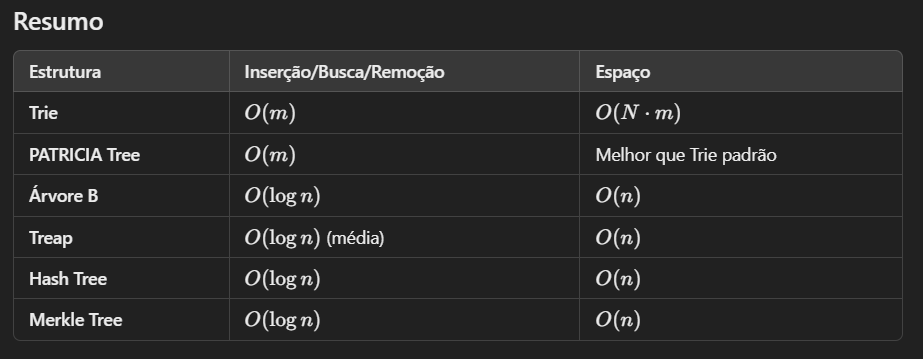

In [ ]:
!pip install tabulate


#<font color=lightgreen>Análise Temporal das Estruturas de Dados Implementadas Acima Inserção/Busca/Remoção:

In [ ]:
import time
from tabulate import tabulate
import hashlib
import random

# Trie Structure
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def delete(self, word):
        def _delete(node, word, depth):
            if not node:
                return False
            if depth == len(word):
                if not node.is_end_of_word:
                    return False
                node.is_end_of_word = False
                return len(node.children) == 0
            char = word[depth]
            if _delete(node.children.get(char), word, depth + 1):
                del node.children[char]
                return not node.is_end_of_word and len(node.children) == 0
            return False
        _delete(self.root, word, 0)

# Placeholder PATRICIA Trie (similar complexity, simplified as a Trie)
class PatriciaTrie(Trie):
    pass

# Simplified B-tree using dictionary as a node-based representation
class BTree:
    def __init__(self):
        self.tree = {}

    def insert(self, key, value):
        self.tree[key] = value

    def search(self, key):
        return self.tree.get(key, None)

    def delete(self, key):
        if key in self.tree:
            del self.tree[key]

# Treap - simplified version using Python dicts for demonstration purposes
class Treap:
    def __init__(self):
        self.treap = {}

    def insert(self, key, priority):
        self.treap[key] = priority

    def search(self, key):
        return key in self.treap

    def delete(self, key):
        if key in self.treap:
            del self.treap[key]

# Hash Tree (Merkle Tree concept using dictionary hashes for demonstration)
class HashTree:
    def __init__(self):
        self.tree = {}

    def insert(self, key, data):
        self.tree[key] = hashlib.sha256(data.encode()).hexdigest()

    def search(self, key):
        return key in self.tree

    def delete(self, key):
        if key in self.tree:
            del self.tree[key]

# Merkle Tree (using dictionary to simulate nodes with SHA-256 hashes)
class MerkleTree:
    def __init__(self):
        self.leaves = {}

    def insert(self, data):
        hash_data = hashlib.sha256(data.encode()).hexdigest()
        self.leaves[data] = hash_data

    def search(self, data):
        return data in self.leaves

    def delete(self, data):
        if data in self.leaves:
            del self.leaves[data]

# Function to measure time for operations
def measure_time(structure, operation, *args):
    start_time = time.time()
    if operation == "insert":
        structure.insert(*args)  # Pass only one argument for insert
    elif operation == "search":
        structure.search(*args)
    elif operation == "delete":
        structure.delete(*args)
    return time.time() - start_time

# Testing parameters
elements = ["apple", "banana", "orange", "grape", "cherry"]
results = []

# Measure times for each structure and operation
structures = {
    "Trie": Trie(),
    "PATRICIA": PatriciaTrie(),
    "BTree": BTree(),
    "Treap": Treap(),
    "Hash Tree": HashTree(),
    "Merkle Tree": MerkleTree()
}

for name, structure in structures.items():
    insert_times = 0
    search_times = 0
    delete_times = 0
    for elem in elements:
        # Adjust for BTree by passing both key and value
        if name == "BTree":
            insert_times += measure_time(structure, "insert", elem, random.randint(1, 100))
        # Adjust for Treap by passing both key and priority
        elif name == "Treap":
            insert_times += measure_time(structure, "insert", elem, random.randint(1, 100))
        # Adjust for HashTree by passing both key and data
        elif name == "Hash Tree":
            insert_times += measure_time(structure, "insert", elem, elem)
        else:
            insert_times += measure_time(structure, "insert", elem)

        search_times += measure_time(structure, "search", elem)
        delete_times += measure_time(structure, "delete", elem)

    insert_times /= len(elements)
    search_times /= len(elements)
    delete_times /= len(elements)
    results.append([name, insert_times, search_times, delete_times])

# Display results as a table
print(tabulate(results, headers=["Structure", "Insert Time (s)", "Search Time (s)", "Delete Time (s)"]))


Structure      Insert Time (s)    Search Time (s)    Delete Time (s)
-----------  -----------------  -----------------  -----------------
Trie               5.72205e-06        1.62125e-06        5.76973e-06
PATRICIA           3.00407e-06        1.14441e-06        4.00543e-06
BTree              6.67572e-07        5.72205e-07        7.15256e-07
Treap              5.24521e-07        3.8147e-07         4.76837e-07
Hash Tree          4.91142e-06        6.19888e-07        5.24521e-07
Merkle Tree        1.57356e-06        7.62939e-07        5.24521e-07


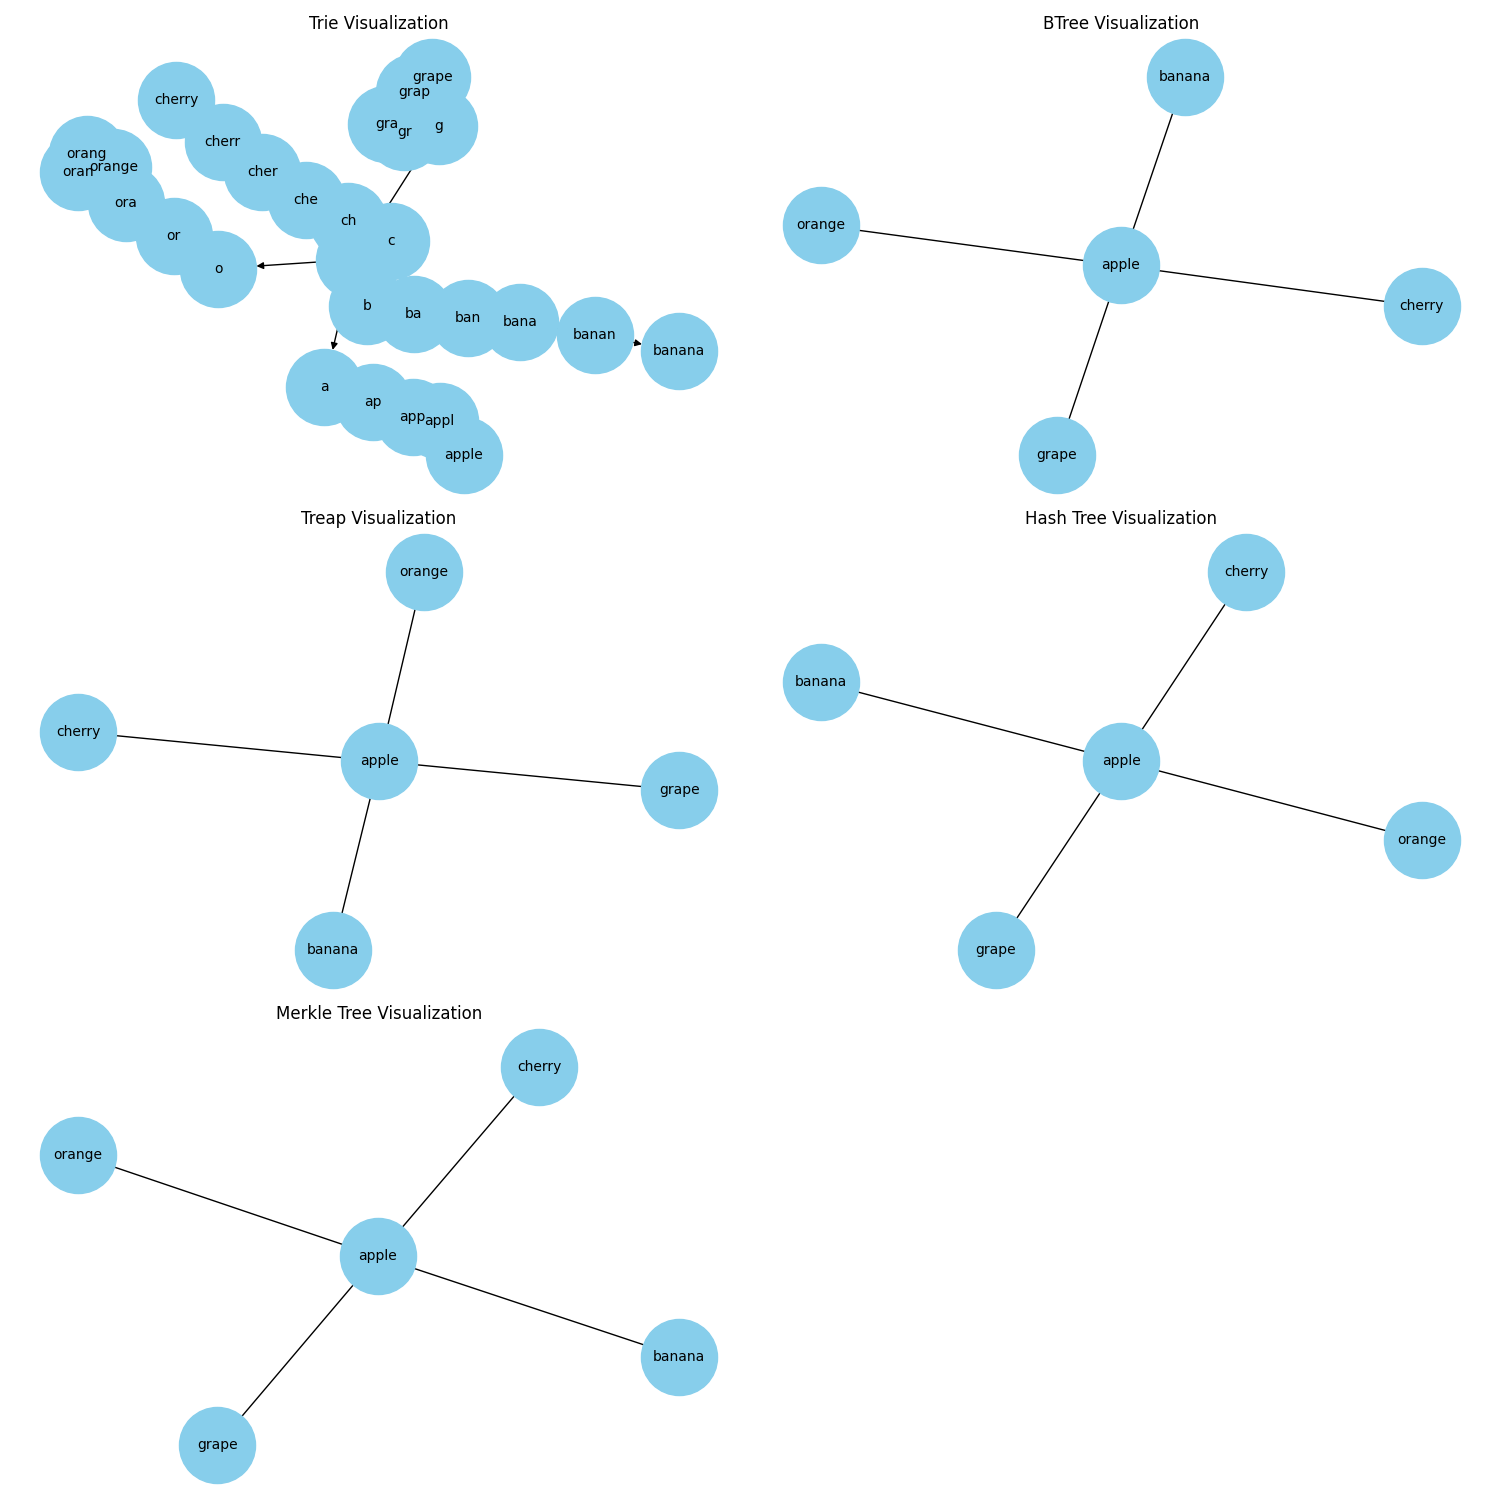

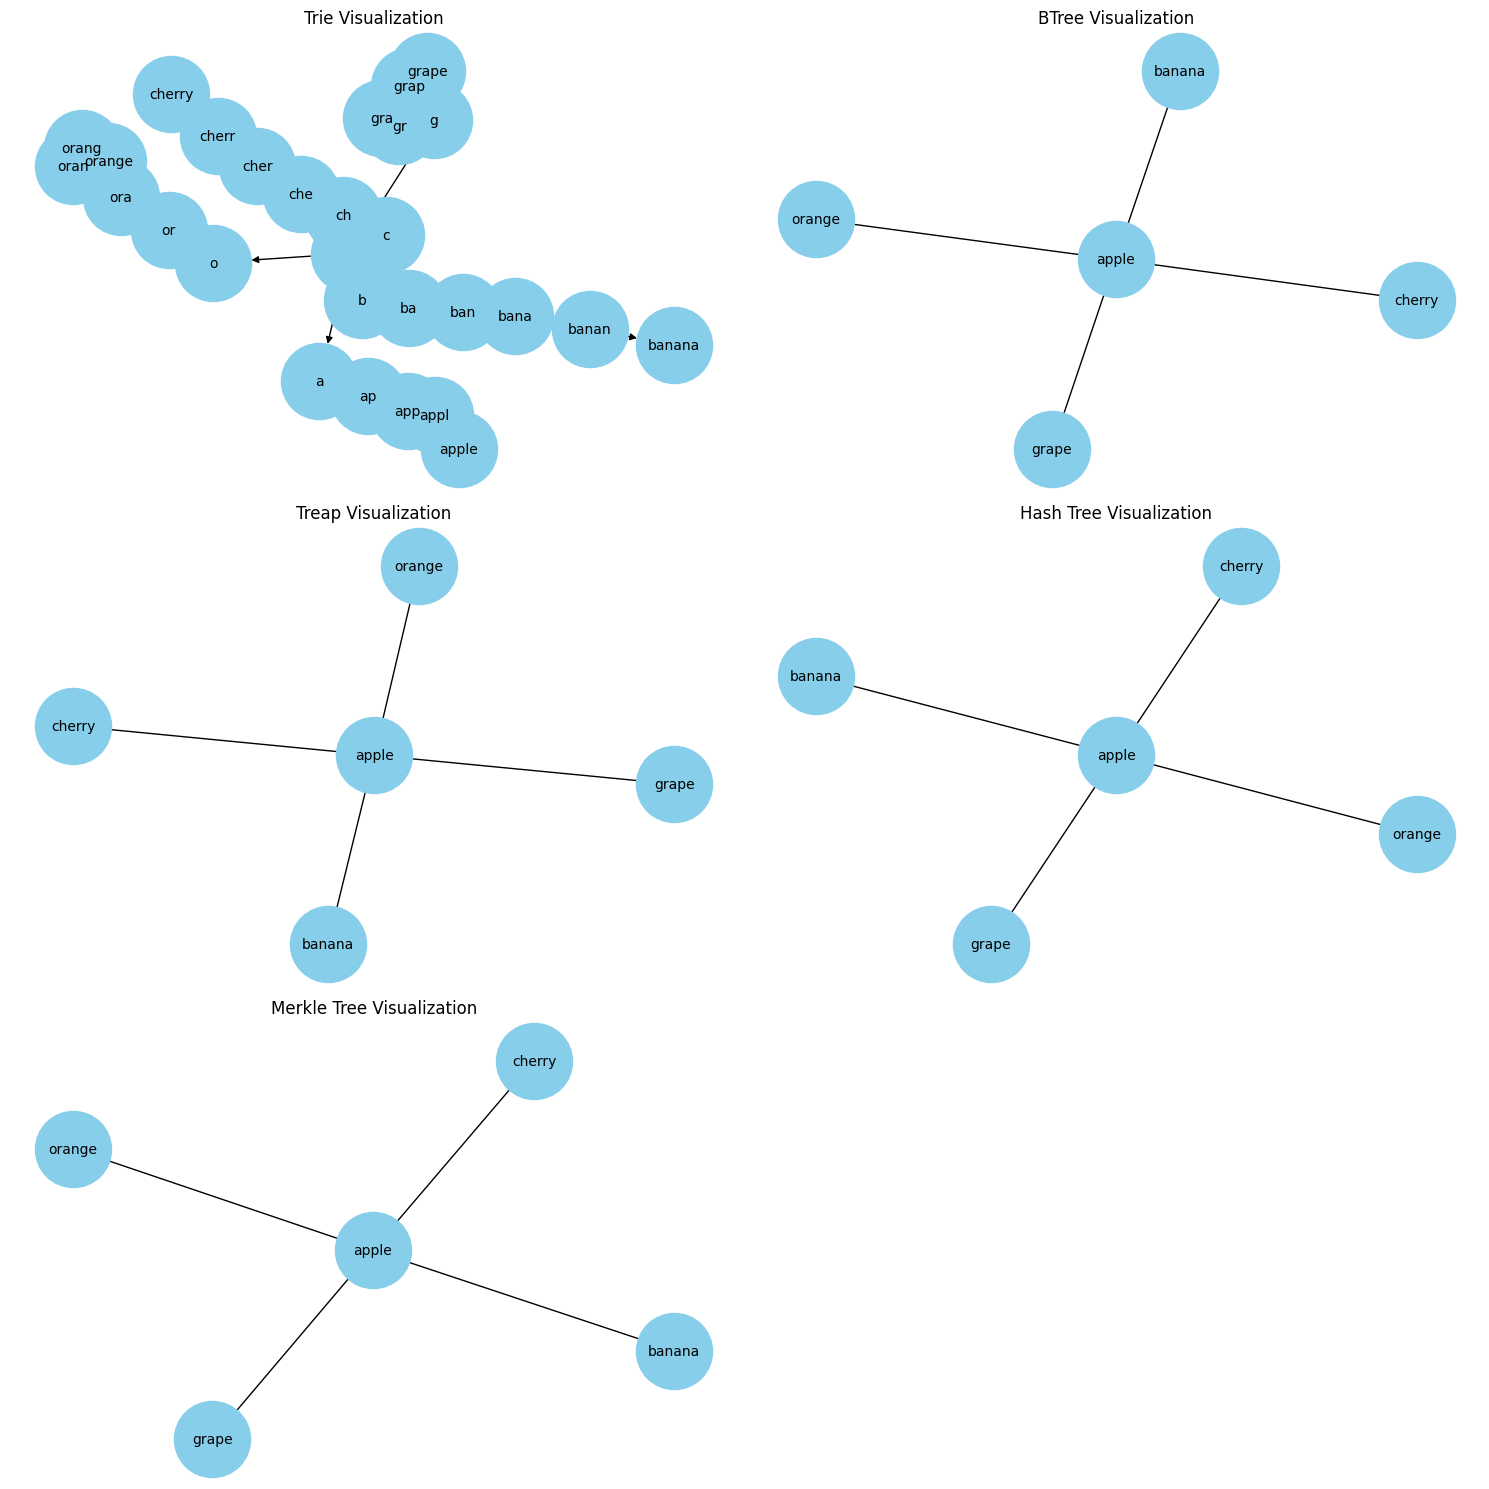

In [ ]:
import time
import hashlib
import random
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Trie Structure
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def delete(self, word):
        def _delete(node, word, depth):
            if not node:
                return False
            if depth == len(word):
                if not node.is_end_of_word:
                    return False
                node.is_end_of_word = False
                return len(node.children) == 0
            char = word[depth]
            if _delete(node.children.get(char), word, depth + 1):
                del node.children[char]
                return not node.is_end_of_word and len(node.children) == 0
            return False
        _delete(self.root, word, 0)

    def visualize(self):
        G = nx.DiGraph()
        self._add_edges(self.root, "", G)
        return G

    def _add_edges(self, node, prefix, G):
        for char, child in node.children.items():
            new_prefix = prefix + char
            G.add_edge(prefix, new_prefix)
            self._add_edges(child, new_prefix, G)

# BTree simplified as a dictionary-based structure
class BTree:
    def __init__(self):
        self.tree = {}

    def insert(self, key, value):
        self.tree[key] = value

    def search(self, key):
        return self.tree.get(key, None)

    def delete(self, key):
        if key in self.tree:
            del self.tree[key]

    def visualize(self):
        G = nx.Graph()
        for key, value in self.tree.items():
            G.add_node(key, label=value)
            if key != list(self.tree.keys())[0]:
                G.add_edge(list(self.tree.keys())[0], key)
        return G

# Treap - simplified using dictionary
class Treap:
    def __init__(self):
        self.treap = {}

    def insert(self, key, priority):
        self.treap[key] = priority

    def search(self, key):
        return key in self.treap

    def delete(self, key):
        if key in self.treap:
            del self.treap[key]

    def visualize(self):
        G = nx.Graph()
        for key, priority in self.treap.items():
            G.add_node(key, label=priority)
            if key != list(self.treap.keys())[0]:
                G.add_edge(list(self.treap.keys())[0], key)
        return G

# Hash Tree - using SHA256 as hash
class HashTree:
    def __init__(self):
        self.tree = {}

    def insert(self, key, data):
        self.tree[key] = hashlib.sha256(data.encode()).hexdigest()

    def search(self, key):
        return key in self.tree

    def delete(self, key):
        if key in self.tree:
            del self.tree[key]

    def visualize(self):
        G = nx.Graph()
        for key, value in self.tree.items():
            G.add_node(key, label=value)
            if key != list(self.tree.keys())[0]:
                G.add_edge(list(self.tree.keys())[0], key)
        return G

# Merkle Tree using SHA256
class MerkleTree:
    def __init__(self):
        self.leaves = {}

    def insert(self, data):
        hash_data = hashlib.sha256(data.encode()).hexdigest()
        self.leaves[data] = hash_data

    def search(self, data):
        return data in self.leaves

    def delete(self, data):
        if data in self.leaves:
            del self.leaves[data]

    def visualize(self):
        G = nx.Graph()
        for data, hash_data in self.leaves.items():
            G.add_node(data, label=hash_data)
            if data != list(self.leaves.keys())[0]:
                G.add_edge(list(self.leaves.keys())[0], data)
        return G

# Testing parameters
elements = ["apple", "banana", "orange", "grape", "cherry"]
results = []

# Generate graphs for each structure
structures = {
    "Trie": Trie(),
    "BTree": BTree(),
    "Treap": Treap(),
    "Hash Tree": HashTree(),
    "Merkle Tree": MerkleTree()
}

# Insert elements into structures and visualize
graphs = []
for name, structure in structures.items():
    for elem in elements:
        if name == "BTree":
            structure.insert(elem, random.randint(1, 100))
        elif name == "Treap":
            structure.insert(elem, random.randint(1, 100))
        elif name == "Hash Tree":
            structure.insert(elem, elem)
        else:
            structure.insert(elem)

    graphs.append((name, structure.visualize()))

# Combine all graphs into one figure
plt.figure(figsize=(15, 15))

for i, (name, graph) in enumerate(graphs):
    plt.subplot(3, 2, i + 1)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10)
    plt.title(f"{name} Visualization")

# Save the figure
plt.tight_layout()
plt.savefig("data_structures.png")

# Display the saved image
from IPython.display import Image
Image(filename="data_structures.png")


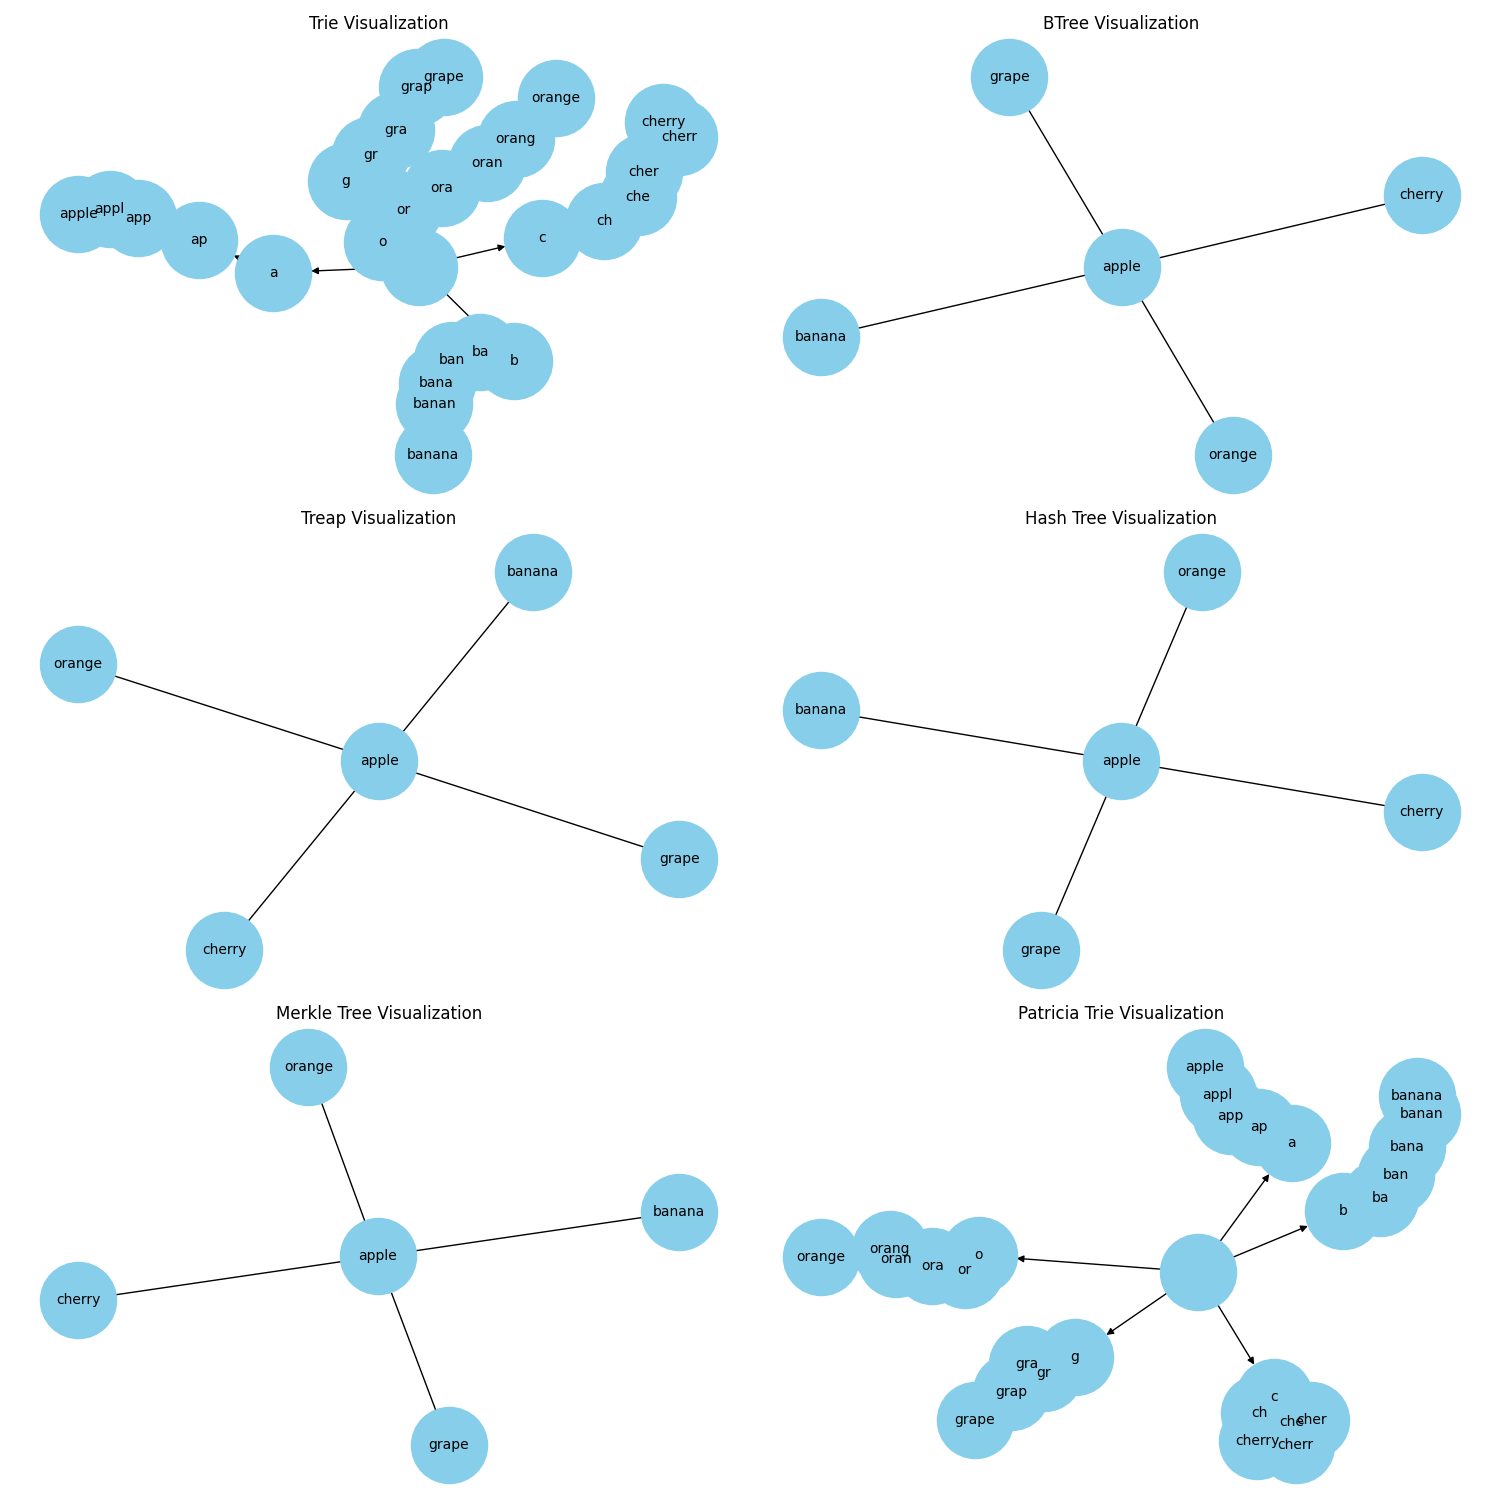

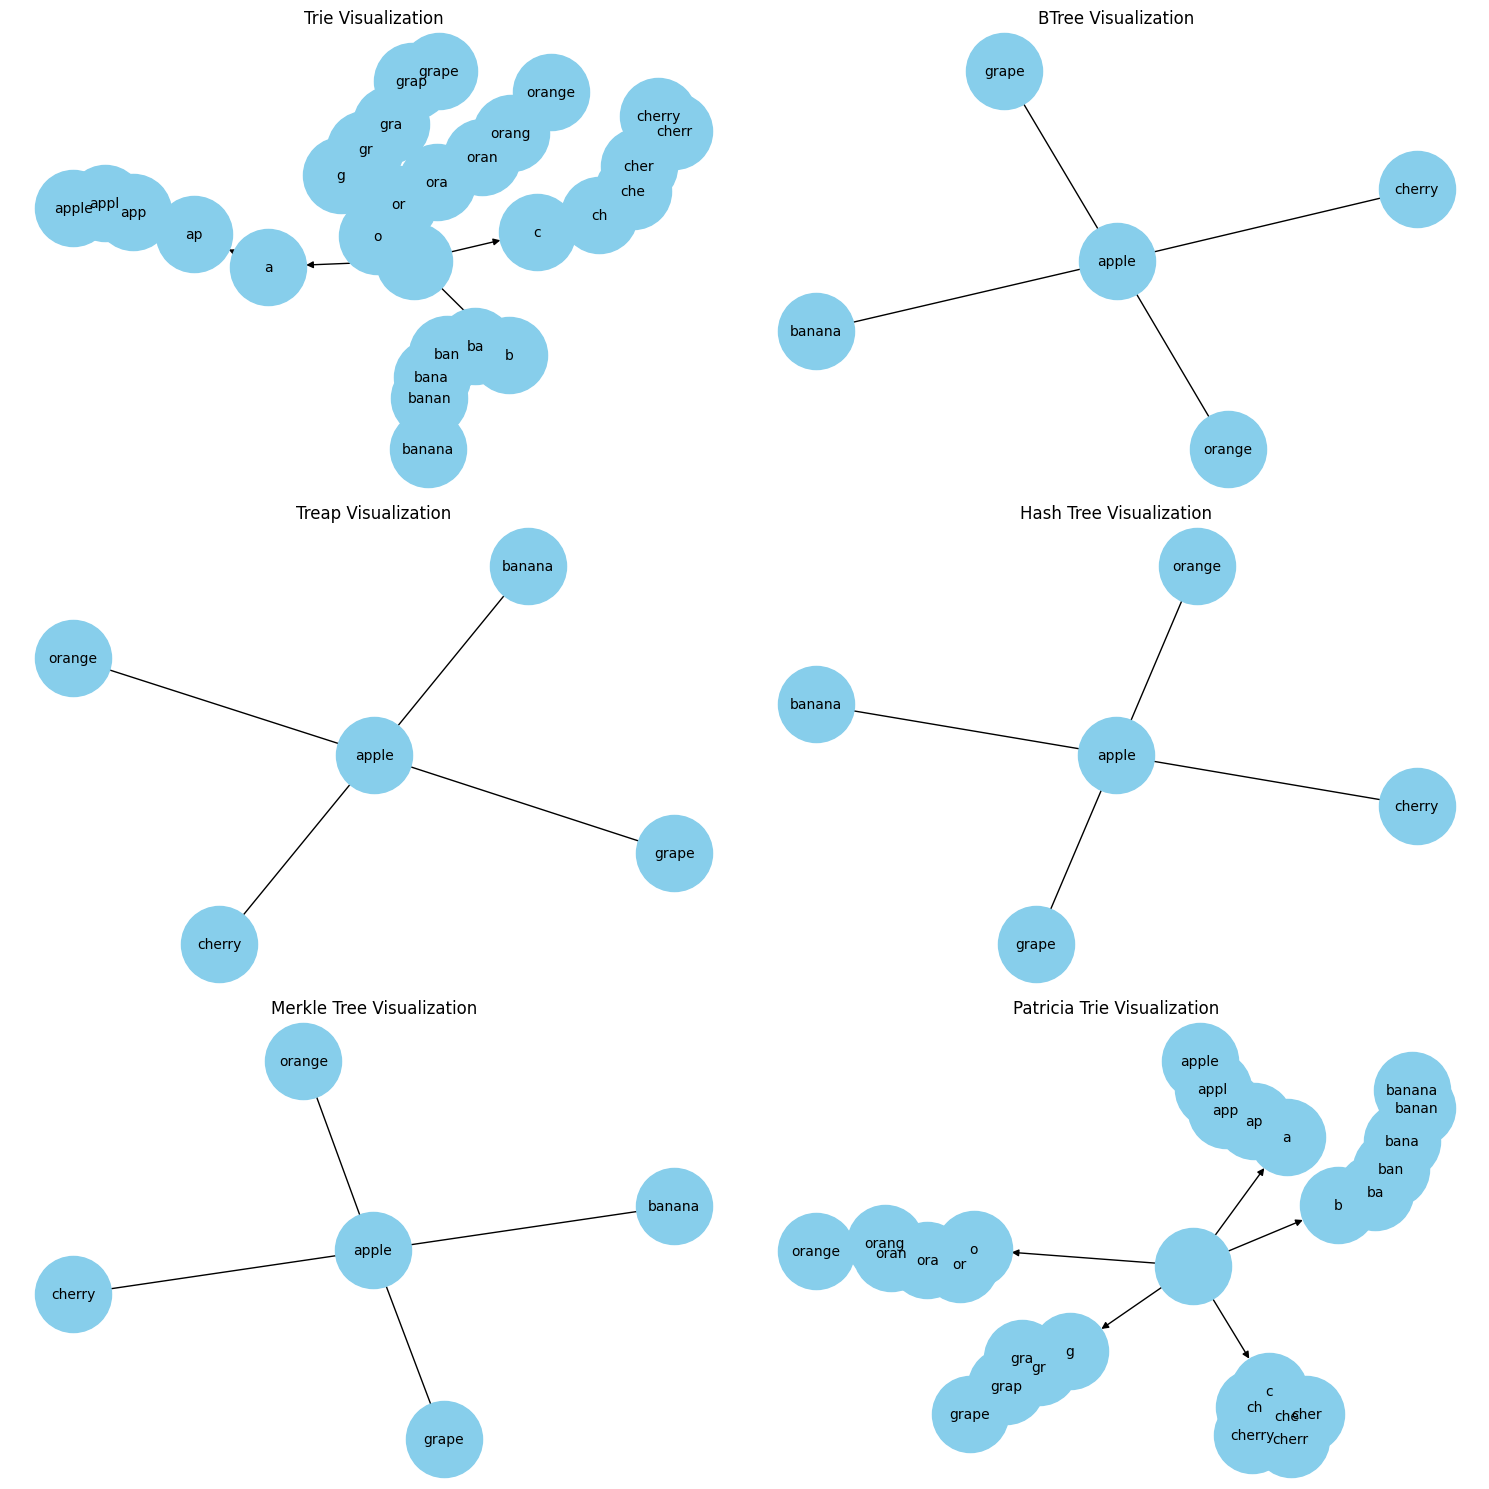

In [ ]:
import time
import hashlib
import random
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Patricia Trie Structure
class PatriciaNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False
        self.prefix = None

class PatriciaTrie:
    def __init__(self):
        self.root = PatriciaNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = PatriciaNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def delete(self, word):
        def _delete(node, word, depth):
            if not node:
                return False
            if depth == len(word):
                if not node.is_end_of_word:
                    return False
                node.is_end_of_word = False
                return len(node.children) == 0
            char = word[depth]
            if _delete(node.children.get(char), word, depth + 1):
                del node.children[char]
                return not node.is_end_of_word and len(node.children) == 0
            return False
        _delete(self.root, word, 0)

    def visualize(self):
        G = nx.DiGraph()
        self._add_edges(self.root, "", G)
        return G

    def _add_edges(self, node, prefix, G):
        for char, child in node.children.items():
            new_prefix = prefix + char
            G.add_edge(prefix, new_prefix)
            self._add_edges(child, new_prefix, G)


# BTree simplified as a dictionary-based structure
class BTree:
    def __init__(self):
        self.tree = {}

    def insert(self, key, value):
        self.tree[key] = value

    def search(self, key):
        return self.tree.get(key, None)

    def delete(self, key):
        if key in self.tree:
            del self.tree[key]

    def visualize(self):
        G = nx.Graph()
        for key, value in self.tree.items():
            G.add_node(key, label=value)
            if key != list(self.tree.keys())[0]:
                G.add_edge(list(self.tree.keys())[0], key)
        return G

# Treap - simplified using dictionary
class Treap:
    def __init__(self):
        self.treap = {}

    def insert(self, key, priority):
        self.treap[key] = priority

    def search(self, key):
        return key in self.treap

    def delete(self, key):
        if key in self.treap:
            del self.treap[key]

    def visualize(self):
        G = nx.Graph()
        for key, priority in self.treap.items():
            G.add_node(key, label=priority)
            if key != list(self.treap.keys())[0]:
                G.add_edge(list(self.treap.keys())[0], key)
        return G

# Hash Tree - using SHA256 as hash
class HashTree:
    def __init__(self):
        self.tree = {}

    def insert(self, key, data):
        self.tree[key] = hashlib.sha256(data.encode()).hexdigest()

    def search(self, key):
        return key in self.tree

    def delete(self, key):
        if key in self.tree:
            del self.tree[key]

    def visualize(self):
        G = nx.Graph()
        for key, value in self.tree.items():
            G.add_node(key, label=value)
            if key != list(self.tree.keys())[0]:
                G.add_edge(list(self.tree.keys())[0], key)
        return G

# Merkle Tree using SHA256
class MerkleTree:
    def __init__(self):
        self.leaves = {}

    def insert(self, data):
        hash_data = hashlib.sha256(data.encode()).hexdigest()
        self.leaves[data] = hash_data

    def search(self, data):
        return data in self.leaves

    def delete(self, data):
        if data in self.leaves:
            del self.leaves[data]

    def visualize(self):
        G = nx.Graph()
        for data, hash_data in self.leaves.items():
            G.add_node(data, label=hash_data)
            if data != list(self.leaves.keys())[0]:
                G.add_edge(list(self.leaves.keys())[0], data)
        return G

# Testing parameters
elements = ["apple", "banana", "orange", "grape", "cherry"]
results = []

# Generate graphs for each structure
structures = {
    "Trie": Trie(),
    "BTree": BTree(),
    "Treap": Treap(),
    "Hash Tree": HashTree(),
    "Merkle Tree": MerkleTree(),
    "Patricia Trie": PatriciaTrie()
}

# Insert elements into structures and visualize
graphs = []
for name, structure in structures.items():
    for elem in elements:
        if name == "BTree":
            structure.insert(elem, random.randint(1, 100))
        elif name == "Treap":
            structure.insert(elem, random.randint(1, 100))
        elif name == "Hash Tree":
            structure.insert(elem, elem)
        elif name == "Patricia Trie":
            structure.insert(elem)
        else:
            structure.insert(elem)

    graphs.append((name, structure.visualize()))

# Combine all graphs into one figure
plt.figure(figsize=(15, 15))

for i, (name, graph) in enumerate(graphs):
    plt.subplot(3, 2, i + 1)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10)
    plt.title(f"{name} Visualization")

# Save the figure
plt.tight_layout()
plt.savefig("data_structures_with_patricia.png")

# Display the saved image
from IPython.display import Image
Image(filename="data_structures_with_patricia.png")
